## Text Representation Using Bag of N-grams
**Bag of n-grams** is a common technique used in NLP for text analysis. It involves breaking down a text into smaller pieces called n-grams, which are contiguous sequences of n words. For example, if we have the sentence "The quick brown fox jumps over the lazy dog," and we set n=2, we can create bigrams such as "the quick," "quick brown," "brown fox," etc.

The bag of n-grams model then counts the frequency of each n-gram in the text and creates a vector representation of the text based on these counts. This vector can be used for various NLP tasks such as sentiment analysis, topic modeling, and text classification.

The term "bag" refers to the fact that the order of the n-grams is not considered in this model, only their frequency. This makes it a simple yet effective method for analyzing text data.

* **Bag Of Words** approach works fine but if think here we're missing an important point which is, in a language the order of word is important. In Bag of Words model we're just counting individual word but we're not capturing the relationship between the words. If we change the order of words in a sentence, the meaning of sentence will change completely. See the following image:

<img src = "img.png" width = "700px" height = "500px"></img>

* So if there is a way to capture the order of the words in a sentence, that would be very useful. So in **Bag of n-grams approach** instead of capturing a single word, we capture pair of words which is called **Bi-gram.** In **Tri-gram** we have a moving window where we capture three words.
* The generic term for representing the words is **n-grams.** So we can have 4-grams, 5-grams and so on.
* So now in n-gram representation we see some scense, it give almost proper meaning. See the bellow image:

<img src = "img1.png" width = "700px" height = "500px"></img>

* Generally the **BOW** is a special case of **Bag of n-grams** where the value of n is 1. 

<img src = "img2.png" width = "700px" height = "500px"></img>

* Let's look at some other examples. Here we have three documents. In NLP by documents means a text, a paragraph, a news article and so on. 
* If you want to build a Bag of Words model, the general approach is, you do some preprocessing, you remove stop words and you do lemmatization and then you will get clean or post processed text. & Then you build a Bag of word model or countVectorizer model. After that you just count the number of words for each document which is called **Bag of Words** or **1-gram.**

<img src = "img3.png" width = "700px" height = "500px"></img>

* If we create Bi-grams, it will look like:

<img src = "img4.png" width = "700px" height = "500px"></img>

* So then the generated vectors can be used to train a ML model.
* One approach that people use is, they use **1-gram** and **2-gram** combinely, because then you will have a vector which represent the whole sentence in more meaningful way. Here we can have meaningful similarity between two or n documents. So by using 1-gram and bi-gram you can create more meaningful representation of your text.

<img src = "img5.png" width = "700px" height = "500px"></img>

**Limitation of Bag of n-grams model**
1. As n increased, dimensionality, sparsity increas.
2. Doesn't address out of vocabulary (OOV) problem. While training a model, you train on a certain dataset but when you do prediction, you get totally new words and it's now hard to represent those new words in a vector.

In [2]:
# CountVectorizer:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()                               # Object of the CountVectorizer
v.fit(["Thor Hathodawala is looking for a job"])    # Single sentence to be fitted.
v.vocabulary_                                       # Will create a vocabulary

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [4]:
# So this is again BOW, if you check the documentation of sklearn library, by default it's 1-gram.
# So if we supply 'n-grams' parameter, it will create a pair of words which is bi-grams.

v = CountVectorizer(ngram_range = (2,2))            # Will generate 2-grams                                        
v.fit(["Thor Hathodawala is looking for a job"])    
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [5]:
# If we supply (1,2), it will generate both 1-grams and 2-grams.
v = CountVectorizer(ngram_range = (1,2))                              
v.fit(["Thor Hathodawala is looking for a job"])    
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [6]:
# If we supply (1,3), it will generate 1-grams, 2-grams and 3-grams:
v = CountVectorizer(ngram_range = (1,3))                              
v.fit(["Thor Hathodawala is looking for a job"])    
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [7]:
# Now let's have a corpus of three sentences (3 documents).
# Corpus is a collection of documents or list of strings.
corpus = [                        
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [9]:
# For corpus we first write a preprocessing function to remove stop words, do lemmatization and so on, and then we'll apply 
# Bi-gram CountVectorizer to see how the vector space model look like? (how it convert text into a vector?)


import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:    # Will ignore stop words and punctuation marks.
            continue
        filtered_tokens.append(token.lemma_)   # Lemm_ give us the base word.
    
    return " ".join(filtered_tokens)           # Will convert list into a string and return it.

In [10]:
# Now if we pass a single sentence to the function:
preprocess("Thor ate pizza")

'thor eat pizza'

In [11]:
# If we try another sentence:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [12]:
# Here we run a for loop on our original corpus to preprocess all the documents (sentences).
# Here the python list comprehension is used.

corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [13]:
# Now that we have processed text, we're going to use CountVectorizer to generate both 1-grams and 2-grams (1,2) vocabulary.
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)                     # fit() will create that vocabulary, we just supply the preprocessed text.
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [14]:
# Now once the vocabulary is prepared, we can take a new sentence and we can do text to vector conversion on it as ML need 
# a numbers not text.
# Means we convert the new sentence to vector using Bag of n-grams model.

# v.transform(["Thor eat pizza"])            # will give you a matrix.
v.transform(["Thor eat pizza"]).toarray()    # will give you an array.

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [15]:
# We'll try one more sentence:
v.transform(["Hulk eat pizza"]).toarray()   # Hulk wasn't in our vocabulary, so we'll face OOV problem.

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

* According to previous created vocabulay it will create vectors from the new sentence, here we see the word 'Hulk' wasn't in our vocabulary so it will be skipped (OOV problem).
* See the bellow image:

<img src = "thor_hulk.jpg" width = "700px" height = "400px"></img>

**News Category Classification Problem**

Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and train a machine learning model that can categorize any news into one of the following categories,

    1. BUSINESS
    2. SPORTS
    3. CRIME
    4. SCIENCE
    

**Dataset**

Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

* This data consists of two columns:
   1. Text 
   2. Category
   
   
* Text is a news article
* Category can be one of these 4:
   1. BUSINESS
   2. SPORTS 
   3. CRIME
   4. SCIENCE'
  
  To keep things simple I trimmed additional categories from the original dataset.

In [16]:
# So first we import pandas and read the dataset:
import pandas as pd

df = pd.read_json('news_dataset.json')
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [17]:
# To see the dataset shape:
print(df.shape)

(12695, 2)


In [18]:
# To quick explore the dataset, we first check the categories:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

### Handle class imbalance
As you can see above, SCIENCE category has almost 1/3rd data samples compared to BUSINESS and SPORTS categories. I initially trained a model without handling the imbalanced I saw a lower f1-score for SCIENCE category. Hence we need to address this imbalanced.

We'll use undersampling technique here.

In undersampling, we take a minor class and sample those many samples from other classes, this means we are not utilizing all the data samples for training and in ML world - Not using all the data for training is considered a SIN! 😵 In real life, you are advised to use a technique such as SMOTE so that you can utilize all of your dataset for the training but since this tutorial is more about bag of n-grams then class imbalance itself, I'd go with a simple technique of undersampling.

In [19]:
# So we see some imbalance in the dataset, SCIENCE category is much less than BUSINESS and SPORTS. So we need to tackle with
# this imbalance. So here we'll use the most simplest technique which is called Under-sampling technique.
# So for the SCIENCE category we have 1381 samples, we take randomely 1381 samples from other classes and then we train the 
# model.
# So let's create 1381 samples for BUSINESS class:

min_samples = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class.

df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_business.head(5)

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS


In [20]:
# For Sports Class:
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_sports.head(5)

,text,category
11207,"So, Chris Christie Might End Up Replacing Mike...",SPORTS
1632,'DWTS' Entrant Ryan Lochte Says He Made 'A Ver...,SPORTS
5848,Cowboys' Decal Proves Roger Goodell Is A Joke ...,SPORTS
5303,"Real or 'Fake,' Violence Against Women is Neve...",SPORTS
3829,LIVE: Nigeria Takes On Bosnia-Herzegovina For ...,SPORTS


In [23]:
# For CRIME class: 
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_crime.head(5)

,text,category
7630,Passenger Arrested After In-Flight Yoga Sessio...,CRIME
893,Man Pleads Guilty In Boy's Fatal Beating Over ...,CRIME
11852,LAPD Hacked Into iPhone Of Slain Wife Of 'Shie...,CRIME
12167,U.S. Customs Officers Allegedly Assaulted Cowo...,CRIME
2889,TSA Seizes 81 Pounds Of Pot At Airport,CRIME


In [24]:
# For SCIENCE class we take all the samples. 
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)
df_science.head(5)

,text,category
7210,It's Time We Take A Look At How Female Astrono...,SCIENCE
12292,Scientists Reveal The Secret Key To Charisma I...,SCIENCE
6249,Watch One Of The World's Largest Lakes Shrink ...,SCIENCE
379,'Falling Fruit' Map Helps Foragers Find Their ...,SCIENCE
12505,When Science Fiction Gets Real Many science fi...,SCIENCE


In [25]:
# So to join these samples, we use concate function.
# axis=0 => join the DataFrames on row-level.

df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts() # Will shows us the numbers of values for each class.

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [26]:
# Next we have to convert the Category column into numbers.
# So we create a new column 'category_num' and on exist column 'category' we apply 'map()' function to convert strings 
# into numbers.

# target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [29]:
# To see the new column and assigned category numbers:
df_balanced.sample(5)

,text,category,category_num
5045,"Who Wanted This Dentist Dead? ""She admitted th...",CRIME,2
3378,Gunfire Outside Colorado State Capitol Forces ...,CRIME,2
12541,Fan At Dodger Stadium Gets Really Comfortable,SPORTS,1
4338,5 Ways the IRS Scammers Could Have Stolen All ...,CRIME,2
10056,Principles-Based Regulation and Compliance: A ...,BUSINESS,0


In [27]:
# Now our dataset is ready and we call train_test_split method to split the dataset:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text, 
    df_balanced.category_num, 
    test_size=0.2,                       # 20% samples will go to test dataset
    random_state=2022,                   # If the notebook is run multiple times the valus will not change.
    stratify=df_balanced.category_num    # It will create equal number of samples from all the classes in train and test.
)

In [30]:
# To check the X_train shape:
print(X_train.shape)

(4419,)


In [31]:
# To see five of the X_train samples
X_train.head()

7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [32]:
# To see the values for y_train from each class:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [33]:
# We can check it for y_test also:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [34]:
# Next we create a Bag of Words model. 

# Necessary libraries...
from sklearn.naive_bayes import MultinomialNB       # We use 'Naive Bayes' for classification purpose.
from sklearn.pipeline import Pipeline               # Pipeline takes list of arguments and we define CountVectorizer and
                                                    # classification model.
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer()),        # We use simple CountVectorizer => 1-grams. 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)             # Train the model


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [36]:
# Now here we use 1-grams and 2-grams both and see the performance.

clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),    # Using the ngram_range parameter.    
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)            

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [37]:
# Let's try 3-grams.

clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 3))),    # Using the ngram_range parameter.    
     ('Multi NB', MultinomialNB())         
])

clf.fit(X_train, y_train)            

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



* So we see the performances of 2-grams and 3-grams are little lower than Bag of Words (1-grams), but it's ok, based on a given dataset will try to find the best accuracy and we'll try each of the n-grams.

In [38]:
# If we want to make some prediction, so our first five articles are:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [40]:
# If we look at five first categories:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [41]:
# And our prediction through the model is:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)

* We see 4 out of five is predicted properly.

### Use text pre-processing to remove stop words, punctuations and apply lemmatization
You may wonder, we have not done any text-processing yet to remove stop words, punctuations, apply lemmatization etc. Well we wanted to train the model without any preprocessing first and check the performance. Now we will re-do same thing but with preprocessing of text.

In [42]:
# So here we create a new column 'preprocessed_text' for pre-processed text.
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess) 

In [43]:
# To see some reviews whether preprocessed or not:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [44]:
# Now we'll train the same model but with one differece, instead of 'text' column we use 'preprocessed_txt' column:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
)

In [45]:
# Again if we see the number of y_train from each class:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [46]:
# Similar for y_test:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [47]:
# So we train the model with same 2-grams vocabulary.

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),      
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.90      0.81      0.85       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



* If you compare above classification report for (1,2) gram with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.
* In this problem removing stop words, lemmatization ... have a scense but if we have other cases like sentiment analysis, we'll check both the cases whther removing stop words ... has scense or not?

In [48]:
# To have confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[243,   8,  17,   8],
       [ 10, 228,  29,  10],
       [ 15,   2, 253,   6],
       [ 36,   9,   7, 224]], dtype=int64)

Text(69.0, 0.5, 'Truth')

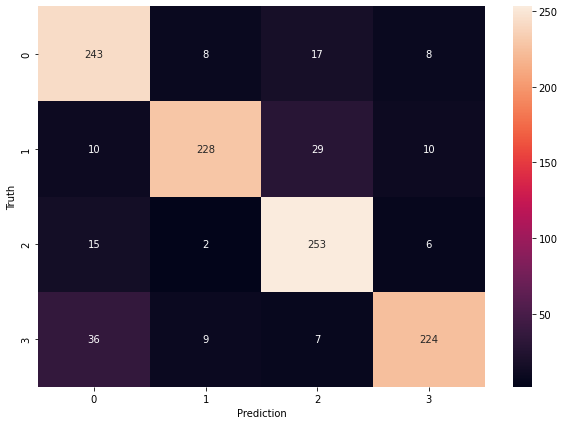

In [49]:
# Confution matrix in a better way:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Exercise
* **A beautiful exercise is given...**